# Multivariant Regression

In [33]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

In [34]:
%store -r final_df
final_df

,Temp,Humidity,Wind,Rain,ISI,Actual Fire
0,51.0,6.7,0.0,5.1,8.2,0.0
1,33.0,0.9,0.0,6.7,18.0,0.0
2,33.0,1.3,0.0,6.7,14.6,0.0
3,97.0,4.0,0.2,9.0,8.3,0.0
4,99.0,1.8,0.0,9.6,11.4,0.0
...,...,...,...,...,...,...
756,65.0,14.0,0.0,4.5,30.0,1.0
757,87.0,15.0,4.4,0.1,28.0,0.0
758,87.0,29.0,0.5,0.4,27.0,0.0
759,54.0,18.0,0.1,1.7,24.0,0.0


In [35]:
final_df.describe()

,Temp,Humidity,Wind,Rain,ISI,Actual Fire
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,49.964474,7.686974,0.258684,7.653421,23.129868,0.535526
std,17.881842,5.778095,1.207761,4.860433,8.088921,0.499065
min,15.000000,0.400000,0.000000,0.000000,2.200000,0.000000
25%,35.000000,3.100000,0.000000,4.100000,17.600000,0.000000
50%,47.000000,4.900000,0.000000,7.500000,22.350000,1.000000
75%,64.000000,14.000000,0.000000,9.800000,30.000000,1.000000
max,100.000000,29.000000,16.800000,56.100000,42.000000,1.000000


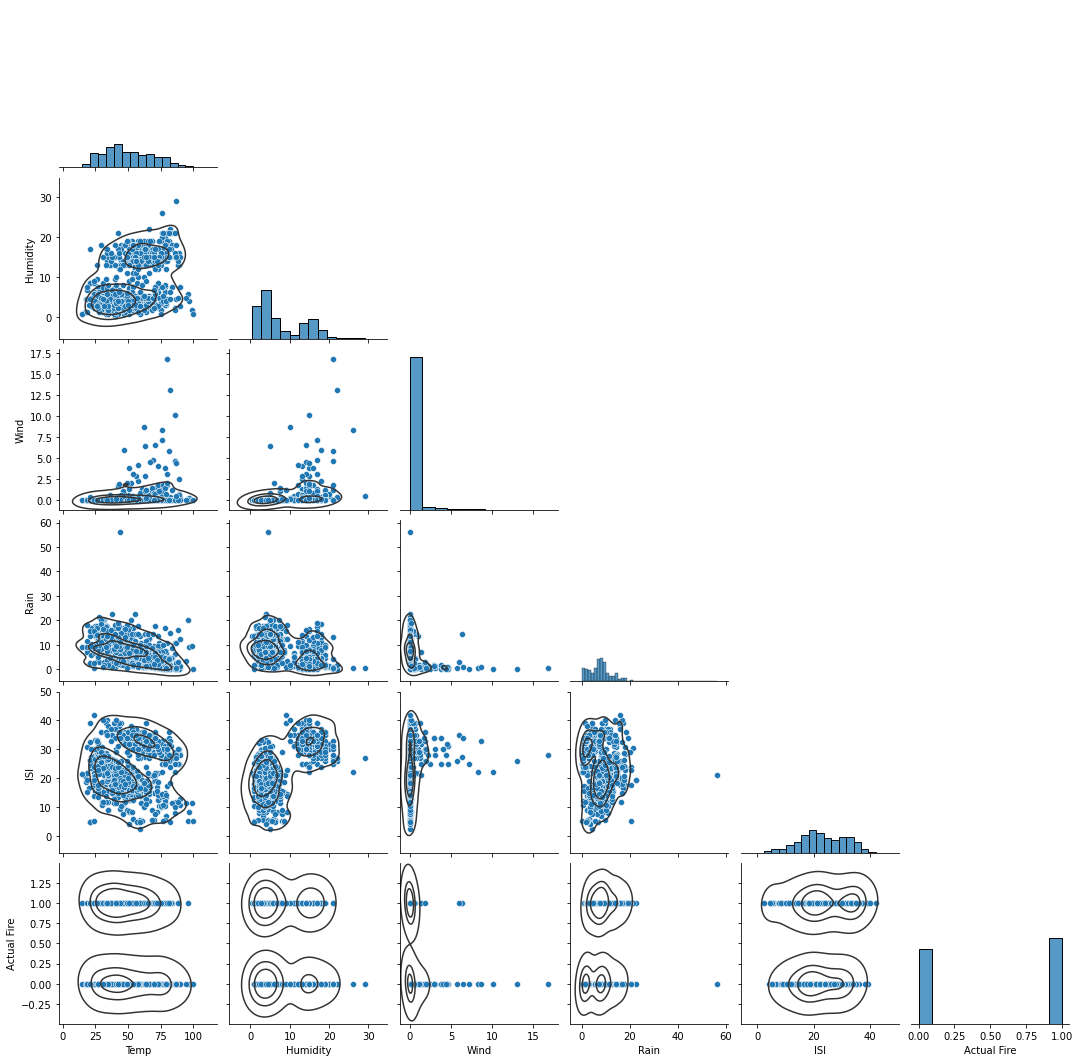

In [36]:
pairplot = sns.pairplot(final_df, diag_kind="hist",  corner=True)
pairplot.map_lower(sns.kdeplot, levels=4, color=".2")

From the scatter plot above we can see the types of relationships between our features and predictor. From this we mostly see little to no relationship meaning that fitting a regression line will be more of a challenge. We do see that the FFMC produces an inverse logistic curve while the Rain feature produces the same curve but reflected over the y axis. These two variables will have to be kept in mind. We also see one clear outlier that will need to be dealt with.

In [37]:
# Create a fitted model with all all features
lm1 = smf.ols(formula='ISI ~ Temp + Humidity + Wind + Rain', data=final_df).fit()

# Print the coefficients
lm1.params

Intercept    19.661397
Temp         -0.139890
Humidity      1.181289
Wind         -0.060965
Rain          0.182044
dtype: float64

After fitting a line to the data we get an intercept of -15. This tells us that when every other feature is zero we will get a negative ISI value which makes sense. For example our temperature would be zero which wouldnt help any fire spread. As for the coefficients for our features they are all positive except for humidity. From our scatterplot we see a slightly negative relationship.

In [38]:
feature_cols = ['Temp', 'Humidity', 'Wind', 'Rain']
X = final_df[feature_cols]
y = final_df.ISI

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

19.661397014472787
[-0.13989046  1.1812889  -0.0609651   0.18204388]


In [39]:
list(zip(feature_cols, lm2.coef_))

[('Temp', -0.13989045584700674),
 ('Humidity', 1.1812888992745108),
 ('Wind', -0.06096510240132953),
 ('Rain', 0.18204387607185457)]

In [40]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ISI   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     214.3
Date:                Sun, 24 Jul 2022   Prob (F-statistic):          8.25e-123
Time:                        10:37:10   Log-Likelihood:                -2378.4
No. Observations:                 760   AIC:                             4767.
Df Residuals:                     755   BIC:                             4790.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.6614      0.865     22.729      0.000      17.963      21.360
Temp          -0.1399      0.013    -10.380      0.000      -0.166      -0.113
Humidity       1.1813      0.041     28.641      0.000       1.100       1.262
Wind          -0.0610      0.179     -0.341      0.733      -0.412       0.290
Rain           0.1820      0.047      3.861      0.000       0.089       0.275
==============================================================================
Omnibus:                      103.114   Durbin-Watson:                   1.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.380
Skew:                          -0.853   Prob(JB):                     1.84e-39
Kurtosis:                       4.650   Cond. No.                         233.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

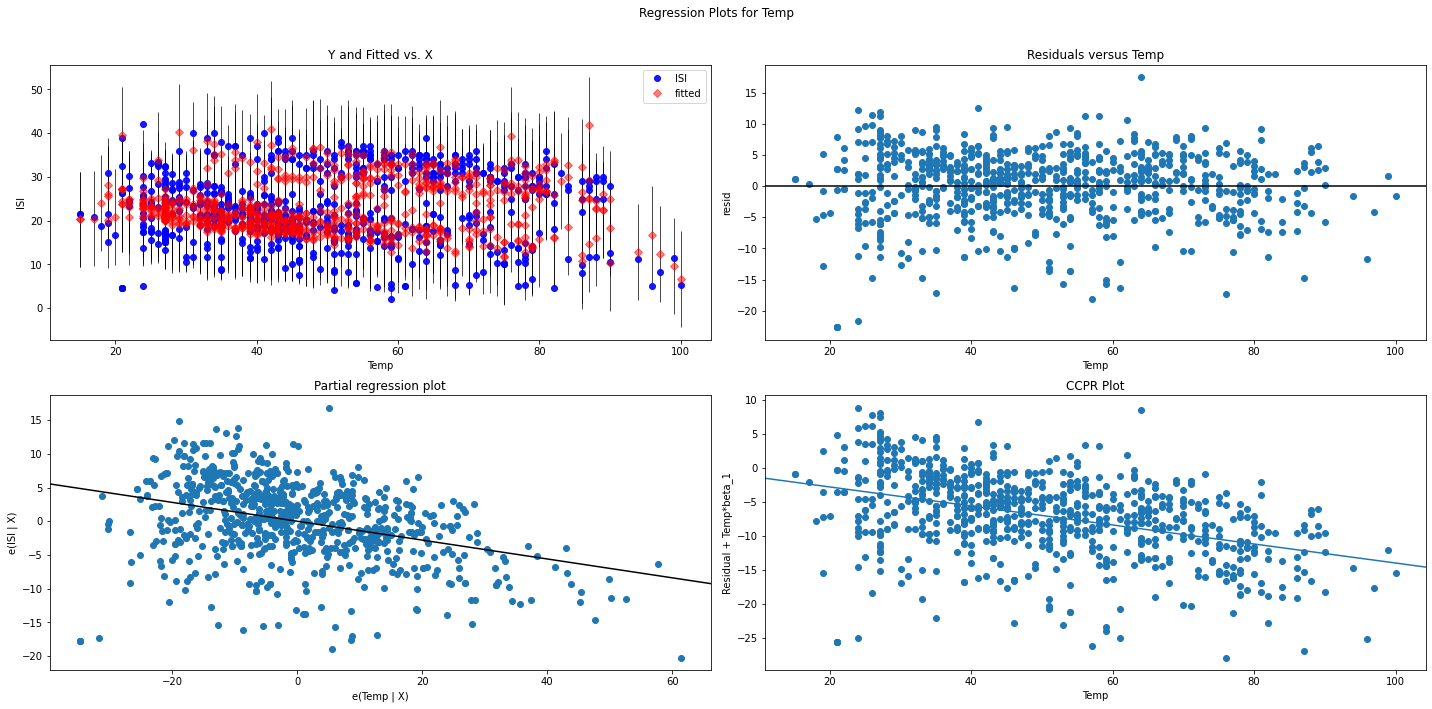

In [42]:
figsize = plt.figure(figsize=(20, 10))
fig = sm.graphics.plot_regress_exog(lm1,
                                    'Temp',
                                    fig=figsize)

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
def create_vif(dataframe):
    ''' This function calculates the Variation Inflation Factors for each column and convert it into a dataframe'''
    
    #create an empty dataframe
    vif_table = pd.DataFrame()
    #populate the first column with the columns of the dataset
    vif_table['variables'] = dataframe.columns
    #calculate the VIF of each column and create a VIF column to store the number
    vif_table['VIF'] = [vif(dataframe.values, i) for i in range(dataframe.shape[1])]
    
    return vif_table

#print the VIF table for each variable
print(create_vif(final_df))

     variables        VIF
0         Temp   5.722884
1     Humidity   6.916993
2         Wind   1.234704
3         Rain   3.850460
4          ISI  12.019131
5  Actual Fire   2.357117


In [11]:
from sklearn import preprocessing
final_df = preprocessing.normalize(final_df)
scaled_values = scaler.fit_transform(final_df) 
final_df.loc[:,:] = scaled_values
final_df

NameError: name 'scaler' is not defined

In [ ]:
print(create_vif(final_df))